In [11]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
originData = pd.read_csv('C:\Project\data\creditcard.csv', index_col='Time')

In [3]:
originData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
def showResult(regr):
    print('Coefficients: ', *regr.coef_)
    print('Intercept: ', *regr.intercept_)
    print('MSE: ', np.mean((regr.predict(x_test)-y_test))**2)
    print('Score: ',regr.score(x_test,y_test))

Coefficients:  [0.12025511]
Intercept:  0.06545521338020993
MSE:  0.023475595318511965
Score:  -0.01893403426442153


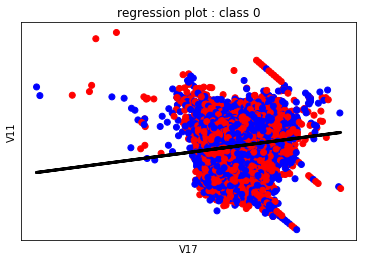

Coefficients:  [-0.26779811]
Intercept:  2.089702386989816
MSE:  0.1962122468325963
Score:  0.5332851973410795


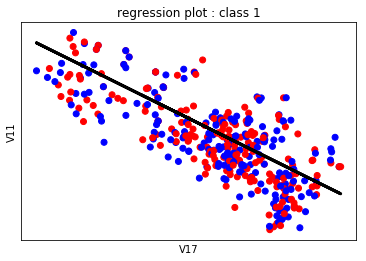

Coefficients:  [-0.1392704]
Intercept:  0.049790682963219236
MSE:  0.006022905166454667
Score:  0.03991046878194837


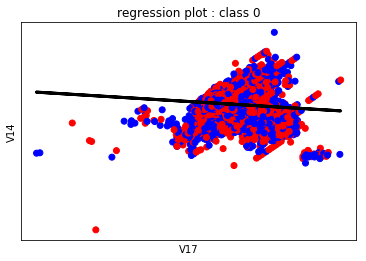

Coefficients:  [0.38118869]
Intercept:  -4.226424897322014
MSE:  0.0011678922693538533
Score:  0.3511950388412549


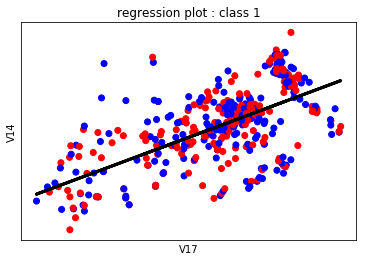

Coefficients:  [0.00654554]
Intercept:  0.03577068079653152
MSE:  0.007244879506585365
Score:  -0.003030161111051255


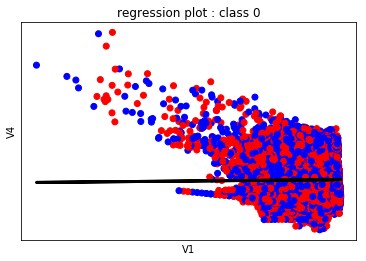

Coefficients:  [-0.24520806]
Intercept:  3.371421944545288
MSE:  0.02566793907511591
Score:  0.3514273460224111


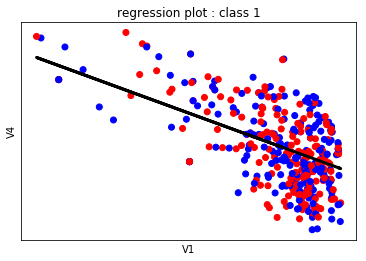

Coefficients:  [-0.02043256]
Intercept:  0.19526348182134604
MSE:  0.1285846898258687
Score:  -0.05793298165879368


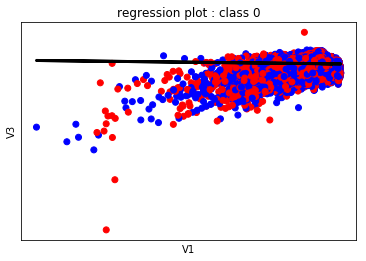

Coefficients:  [0.98302138]
Intercept:  -2.1841958517268765
MSE:  0.016411210940204098
Score:  0.7692199847301967


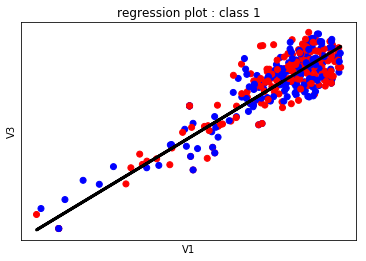

Coefficients:  [0.03898199]
Intercept:  0.03502351440593104
MSE:  0.007173848929507514
Score:  -0.0009737907043929628


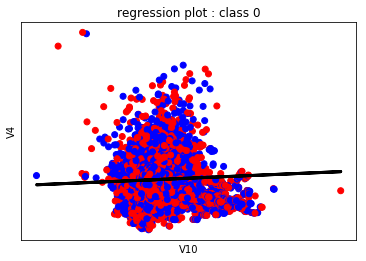

Coefficients:  [-0.44972242]
Intercept:  1.9034705051640386
MSE:  0.02159305956161941
Score:  0.4735199239789021


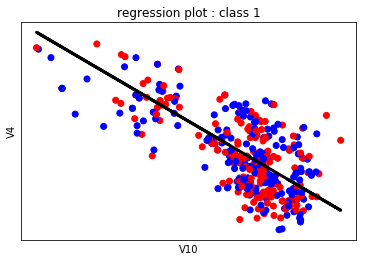

Coefficients:  [0.09263961]
Intercept:  0.031154005198472525
MSE:  0.006041060761013163
Score:  -0.0009221734025977035


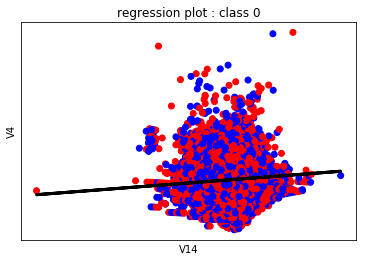

Coefficients:  [-0.43355125]
Intercept:  1.642631038294244
MSE:  0.10245615638119748
Score:  0.32338927937689843


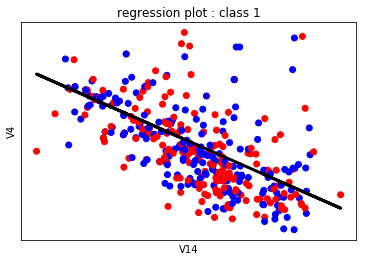

In [100]:
items = [('V17','V11'), ('V17','V14'), ('V1','V4'), ('V1','V3'), ('V10','V4'), ('V14','V4')]
#items = [('V1','V3')]

regr = linear_model.LinearRegression()

for item in items:
    for num in range(0,2,1):
        x = originData[originData['Class']==num][item[0]].values
        y = originData[originData['Class']==num][item[1]].values

        x = x.reshape(len(x),1)
        y = y.reshape(len(y),1)

        x_length = len(x)
        test_count = int(len(x)*.2)

        x_train = x[:-test_count]
        x_test = x[test_count:]

        y_train = y[:-test_count]
        y_test = y[test_count:]

        regr.fit(x_train,y_train)

        ax = plt.subplot(111)
        plt.scatter(x_test,y_test,color=('r','b'))
        plt.plot(x_test,regr.predict(x_test), color='black', linewidth=3)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_xlabel(item[0])
        ax.set_ylabel(item[1])
        plt.title('regression plot : class ' + str(num))

        showResult(regr)
        plt.show()